In [2]:
import pandas as pd
import numpy as np
import helper_functions as hf
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
import importlib
importlib.reload(hf)
import math
import copy
import robustness_test as rt
importlib.reload(rt)


<module 'robustness_test' from 'C:\\Users\\ctata\\Documents\\Lab\\quality_vectors_git\\scripts\\robustness_test.py'>

In [3]:
importlib.reload(rt)
save_dir = "../data/robustness_test/"

f = open(save_dir + "embed_aucs_07.obj", "rb")
embed_aucs_07 = pickle.load(f)
f.close()


f = open(save_dir + "pca_aucs_07.obj", "rb")
pca_aucs_07 = pickle.load(f)
f.close()


f = open(save_dir + "asin_aucs_07.obj", "rb")
asin_aucs_07 = pickle.load(f)
f.close()


aucs_plot_07 = rt.getPlotData(asin_aucs_07, embed_aucs_07, pca_aucs_07)

In [4]:
from scipy.stats import ranksums

p_50 = (ranksums(aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "embed_50", "aucs"], 
         aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "pca_50", "aucs"]).pvalue)

p_100 = (ranksums(aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "embed_100", "aucs"], 
         aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "pca_100", "aucs"]).pvalue)

p_250 = (ranksums(aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "embed_250", "aucs"], 
         aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "pca_250", "aucs"]).pvalue)

p_500 = (ranksums(aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "embed_500", "aucs"], 
         aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "pca_500", "aucs"]).pvalue)

p_750 = (ranksums(aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "embed_750", "aucs"], 
         aucs_plot_07.loc[aucs_plot_07.loc[:, "method"] == "pca_750", "aucs"]).pvalue)

pvals = np.array([p_50, p_100, p_250, p_500, p_750])

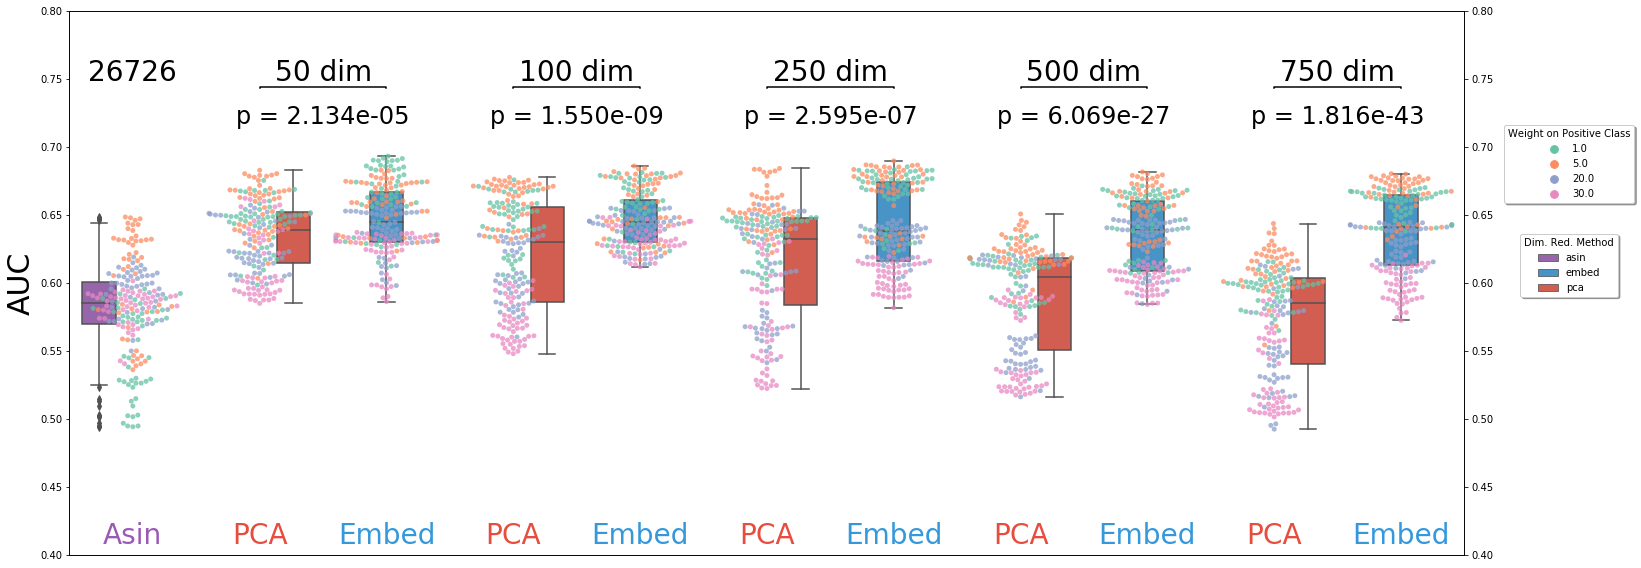

In [8]:
importlib.reload(rt)
fig = rt.plotRobustness(aucs_plot_07, y = "aucs", pvals = pvals, numTaxa = 26726)
#fig.savefig("../figures/robustness_test_.07.pdf")

In [5]:
def getBestParams(auc_table, metric = "f1"):
    if metric == "f1":
        metric = 5
    if metric == "auc":
        metric = 0
    if metric == "precision":
        metric = 4
    return(auc_table.iloc[np.argmax(auc_table.iloc[:, metric]), :])

asin_aucs = aucs_plot_07.loc[aucs_plot_07.method == "asin", :]
embed_aucs_100 = aucs_plot_07.loc[aucs_plot_07.method == "embed_100", :]
pca_aucs_100 = aucs_plot_07.loc[aucs_plot_07.method == "pca_100", :]

#metric = "auc"
#print(getBestParams(asin_aucs.loc[asin_aucs.depth == 2, :], metric = metric))
#print(getBestParams(embed_aucs_100.loc[embed_aucs_100.depth == 2, :], metric = metric))
#print(getBestParams(pca_aucs_100.loc[pca_aucs_100.depth == 2, :], metric = metric))


metric = "f1"
print(getBestParams(asin_aucs, metric = metric))
print(getBestParams(embed_aucs_100, metric = metric))
print(getBestParams(pca_aucs_100, metric = metric))

aucs            0.613028
depth                  5
numTrees             170
weight                20
precision        0.14161
f1              0.167059
method              asin
method_color        asin
Name: 114, dtype: object
aucs             0.655234
depth                   5
numTrees               95
weight                 20
precision        0.163284
f1               0.217866
method          embed_100
method_color        embed
Name: 94, dtype: object
aucs            0.595857
depth                  5
numTrees              50
weight                20
precision       0.157431
f1              0.175227
method           pca_100
method_color         pca
Name: 82, dtype: object


c:\users\ctata\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
